In [38]:
#imdb-reviews-pt-br.csv

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /home/caiocoutinho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caiocoutinho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
data = pd.read_csv('imdb-reviews-pt-br.csv')
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [42]:
classificacao = data["sentiment"].replace(["neg", "pos"],[0, 1])

data["classificacao"] = classificacao
data.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [43]:
data.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [44]:
print(data["classificacao"].value_counts())

classificacao
0    24765
1    24694
Name: count, dtype: int64


In [49]:
stp_words=stopwords.words('portuguese')
def clean_review(review):
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', review.lower())
    
    cleanreview = " ".join(word for word in letras_min if word not in stp_words)    
    return cleanreview 
 
data['text_pt']=data['text_pt'].apply(clean_review)

In [50]:
data.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,vez sr costner arrumou filme tempo necessário ...,neg,0
1,2,This is an example of why the majority of acti...,exemplo motivo maioria filmes ação mesmos gené...,neg,0
2,3,"First of all I hate those moronic rappers, who...",primeiro tudo odeio raps imbecis poderiam agir...,neg,0
3,4,Not even the Beatles could write songs everyon...,beatles puderam escrever músicas todos gostass...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,filmes fotos latão palavra apropriada verdade ...,neg,0


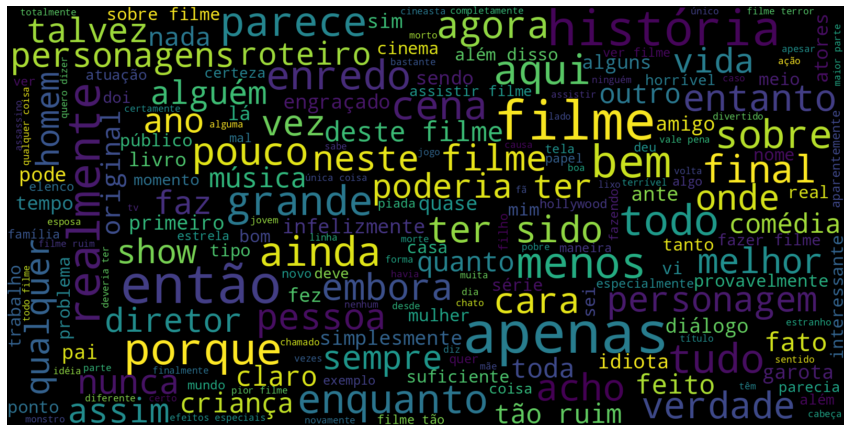

In [51]:
consolidated=' '.join(word for word in data['text_pt'][data['classificacao']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


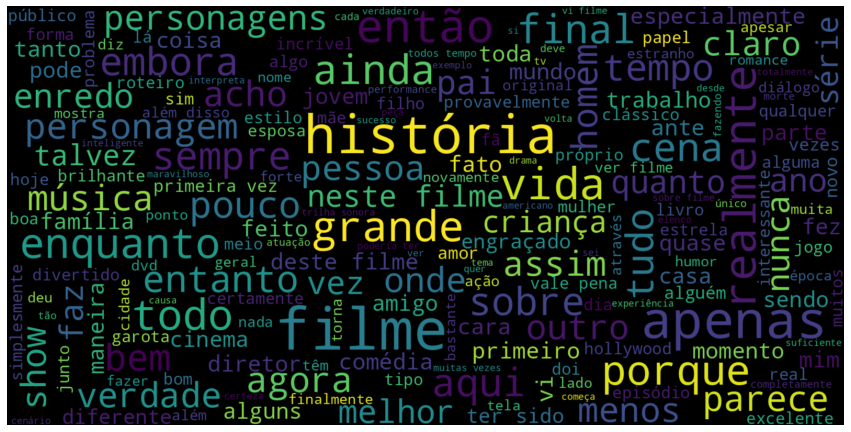

In [52]:
consolidated=' '.join(word for word in data['text_pt'][data['classificacao']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [53]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['text_pt'] ).toarray()

In [54]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['classificacao'],
												test_size=0.25 ,
												random_state=42)


In [55]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))


0.871492114840275


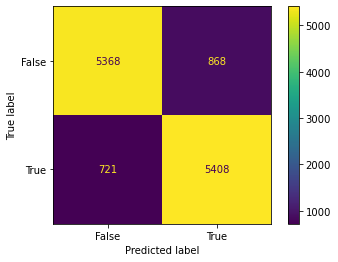

In [56]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True])

cm_display.plot()
plt.show()
